In [66]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CAPSTONE/learning_styles.csv')
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Learner
0,3,3,4,3,2,4,3,3,2,3,4,2,2,3,3,K
1,5,4,4,4,3,3,2,4,3,4,3,4,3,4,4,A
2,3,4,3,3,4,2,4,3,2,2,3,2,3,3,3,A
3,1,3,3,4,4,2,2,2,2,2,4,4,4,4,5,K
4,4,4,4,5,5,4,4,3,4,4,5,5,5,3,3,A


In [69]:
df['Learner'] = df['Learner'].replace({'K': '0_K', 'A': '1_A', 'V': '2_V'})
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Learner
0,3,3,4,3,2,4,3,3,2,3,4,2,2,3,3,0_K
1,5,4,4,4,3,3,2,4,3,4,3,4,3,4,4,1_A
2,3,4,3,3,4,2,4,3,2,2,3,2,3,3,3,1_A
3,1,3,3,4,4,2,2,2,2,2,4,4,4,4,5,0_K
4,4,4,4,5,5,4,4,3,4,4,5,5,5,3,3,1_A


In [70]:
types = df['Learner'].unique()
num_types = len(types)


In [71]:
df = pd.get_dummies(df, columns=['Learner'])
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Learner_0_K,Learner_1_A,Learner_2_V
0,3,3,4,3,2,4,3,3,2,3,4,2,2,3,3,1,0,0
1,5,4,4,4,3,3,2,4,3,4,3,4,3,4,4,0,1,0
2,3,4,3,3,4,2,4,3,2,2,3,2,3,3,3,0,1,0
3,1,3,3,4,4,2,2,2,2,2,4,4,4,4,5,1,0,0
4,4,4,4,5,5,4,4,3,4,4,5,5,5,3,3,0,1,0


In [72]:
dummy_type = ['Learner_0_K', 'Learner_1_A', 'Learner_2_V']
print(dummy_type)

['Learner_0_K', 'Learner_1_A', 'Learner_2_V']


In [73]:
#Split the dataset for training (85%)
from sklearn.model_selection import train_test_split

train_df, valid_df = train_test_split(df, test_size=0.15, random_state=1)

In [74]:
print(train_df)

      Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Q11  Q12  Q13  Q14  Q15  \
996    3   4   5   4   4   4   4   3   3    4    5    5    5    4    4   
672    3   5   5   5   5   4   4   3   2    4    3    4    2    2    3   
930    4   4   4   3   3   1   4   4   3    2    4    4    4    3    4   
390    1   1   4   2   4   3   3   3   4    4    2    4    2    4    2   
1178   2   4   5   5   5   4   3   4   3    3    1    2    2    4    4   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...   
715    3   3   3   5   4   5   2   2   3    3    5    3    3    4    3   
905    4   4   4   2   5   5   4   2   3    3    5    4    5    4    5   
1096   5   3   2   4   4   3   5   5   3    4    5    5    4    4    5   
235    5   3   3   5   4   4   2   5   3    4    3    4    4    2    3   
1061   1   4   4   4   3   4   5   4   3    5    5    5    5    5    4   

      Learner_0_K  Learner_1_A  Learner_2_V  
996             1            0            0  
672             0  

In [75]:
print(f"training examples: {train_df.shape[0]}")
print(f"validation examples: {valid_df.shape[0]}")

training examples: 1028
validation examples: 182


In [76]:
y_train = pd.concat([train_df.pop(dc) for dc in dummy_type], axis=1)
y_valid = pd.concat([valid_df.pop(dc) for dc in dummy_type], axis=1)

In [77]:
y_train.head()

,Learner_0_K,Learner_1_A,Learner_2_V
996,1,0,0
672,0,1,0
930,1,0,0
390,0,0,1
1178,0,1,0


In [78]:
y_valid.head()

,Learner_0_K,Learner_1_A,Learner_2_V
584,0,1,0
970,1,0,0
701,1,0,0
619,0,0,1
534,1,0,0


In [79]:
# Scaling dataset
stats = train_df.describe().transpose()
x_train = (train_df-stats['mean'])/stats['std']
x_valid = (valid_df-stats['mean'])/stats['std']
x_train.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
996,-0.242828,0.540314,1.629784,0.660265,0.691046,0.512625,0.543469,-0.311419,-0.246803,0.578451,1.307158,1.338093,1.206896,0.553207,0.481575
672,-0.242828,1.541111,1.629784,1.588791,1.584624,0.512625,0.543469,-0.311419,-1.186481,0.578451,-0.455148,0.392041,-1.430998,-1.374580,-0.520569
930,0.642375,0.540314,0.642502,-0.268261,-0.202533,-2.420463,0.543469,0.605885,-0.246803,-1.333598,0.426005,0.392041,0.327598,-0.410686,0.481575
390,-2.013235,-2.462078,0.642502,-1.196787,0.691046,-0.465071,-0.416473,-0.311419,0.692876,0.578451,-1.336301,0.392041,-1.430998,0.553207,-1.522713
1178,-1.128032,0.540314,1.629784,1.588791,1.584624,0.512625,-0.416473,0.605885,-0.246803,-0.377574,-2.217455,-1.500063,-1.430998,0.553207,0.481575


In [80]:
print(stats)

      count      mean       std  min   25%  50%  75%  max
Q1   1028.0  3.274319  1.129684  1.0  2.75  3.0  4.0  5.0
Q2   1028.0  3.460117  0.999204  1.0  3.00  4.0  4.0  5.0
Q3   1028.0  3.349222  1.012882  1.0  3.00  3.0  4.0  5.0
Q4   1028.0  3.288911  1.076976  1.0  3.00  3.0  4.0  5.0
Q5   1028.0  3.226654  1.119096  1.0  2.00  3.0  4.0  5.0
Q6   1028.0  3.475681  1.022813  1.0  3.00  4.0  4.0  5.0
Q7   1028.0  3.433852  1.041730  1.0  3.00  4.0  4.0  5.0
Q8   1028.0  3.339494  1.090151  1.0  3.00  3.0  4.0  5.0
Q9   1028.0  3.262646  1.064194  1.0  3.00  3.0  4.0  5.0
Q10  1028.0  3.394942  1.045998  1.0  3.00  3.0  4.0  5.0
Q11  1028.0  3.516537  1.134876  1.0  3.00  4.0  4.0  5.0
Q12  1028.0  3.585603  1.057024  1.0  3.00  4.0  4.0  5.0
Q13  1028.0  3.627432  1.137271  1.0  3.00  4.0  5.0  5.0
Q14  1028.0  3.426070  1.037459  1.0  3.00  4.0  4.0  5.0
Q15  1028.0  3.519455  0.997861  1.0  3.00  4.0  4.0  5.0


In [81]:
# Converting to numpy
train_features = x_train.to_numpy()
valid_features = x_valid.to_numpy()

train_labels = y_train.to_numpy()
valid_labels = y_valid.to_numpy()


In [82]:
print(train_features)

[[-0.24282823  0.54031359  1.62978386 ...  1.20689638  0.5532075
   0.48157491]
 [-0.24282823  1.54111065  1.62978386 ... -1.43099762 -1.37457999
  -0.52056883]
 [ 0.64237538  0.54031359  0.64250171 ...  0.32759838 -0.41068624
   0.48157491]
 ...
 [ 1.527579   -0.46048347 -1.33206259 ...  0.32759838  0.5532075
   1.48371864]
 [ 1.527579   -0.46048347 -0.34478044 ...  0.32759838 -1.37457999
  -0.52056883]
 [-2.01323545  0.54031359  0.64250171 ...  1.20689638  1.51710124
   0.48157491]]


In [83]:
def create_train_valid (features, labels, batch, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices((features, labels))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.batch(batch).prefetch(1)
    return dataset

In [84]:
batch_size = 32
buffer = 50
training = create_train_valid(train_features, train_labels, batch_size, buffer)
validation = create_train_valid(valid_features, valid_labels, batch_size, buffer)

In [85]:
# Build Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(num_types, activation='softmax')
])


model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy', 'mae']
)

history = model.fit(
    training,
    epochs=100,
    validation_data=validation
)

Epoch 1/100
33/33 [==============================] - 1s 7ms/step - loss: 1.0183 - accuracy: 0.5078 - mae: 0.4063 - val_loss: 1.0309 - val_accuracy: 0.5440 - val_mae: 0.4122
Epoch 2/100
33/33 [==============================] - 0s 3ms/step - loss: 0.9779 - accuracy: 0.5370 - mae: 0.3956 - val_loss: 0.9895 - val_accuracy: 0.5385 - val_mae: 0.4007
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 0.9456 - accuracy: 0.5564 - mae: 0.3858 - val_loss: 0.9589 - val_accuracy: 0.5604 - val_mae: 0.3913
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 0.9204 - accuracy: 0.5700 - mae: 0.3775 - val_loss: 0.9325 - val_accuracy: 0.5769 - val_mae: 0.3821
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 0.8976 - accuracy: 0.5749 - mae: 0.3692 - val_loss: 0.9098 - val_accuracy: 0.5934 - val_mae: 0.3738
Epoch 6/100
33/33 [==============================] - 0s 3ms/step - loss: 0.8773 - accuracy: 0.5837 - mae: 0.3615 - val_loss: 0.8913 - v

In [86]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 64        
                                                                 
 dense_5 (Dense)             (None, 3)                 15        
                                                                 
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


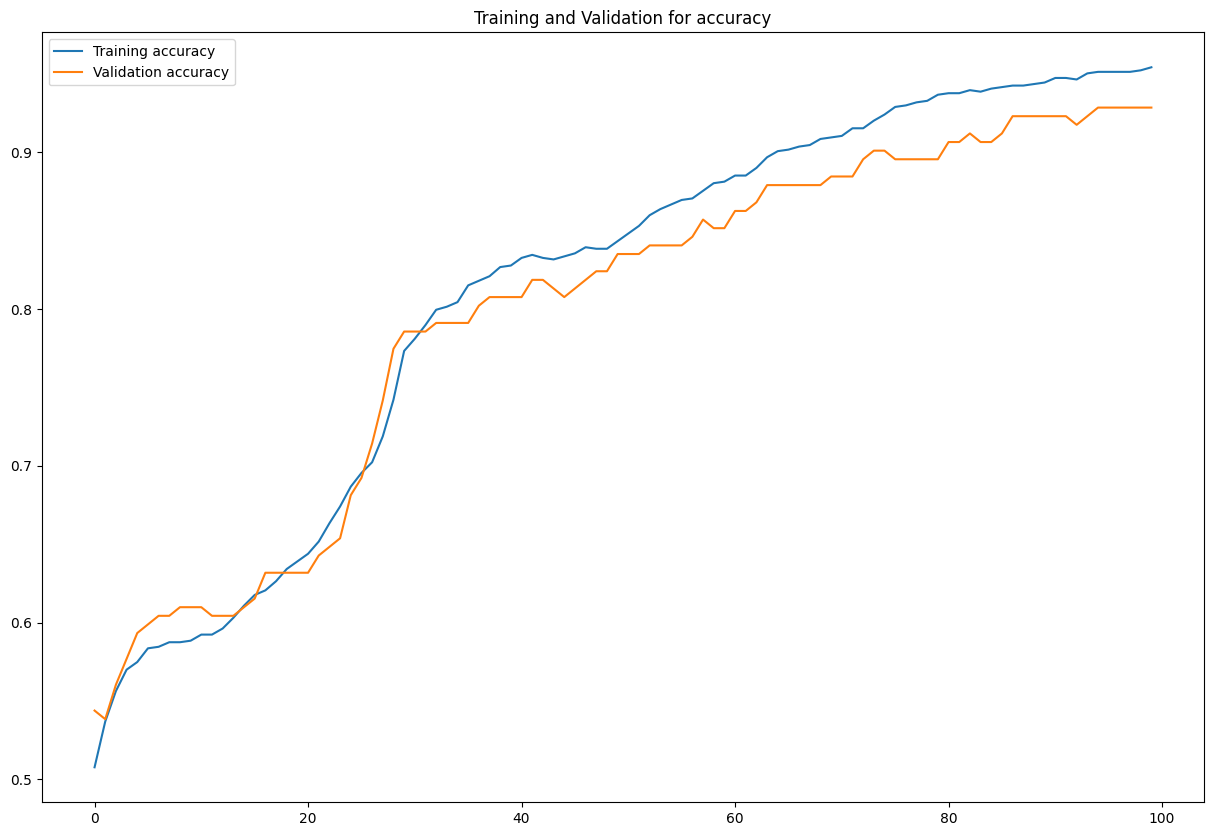

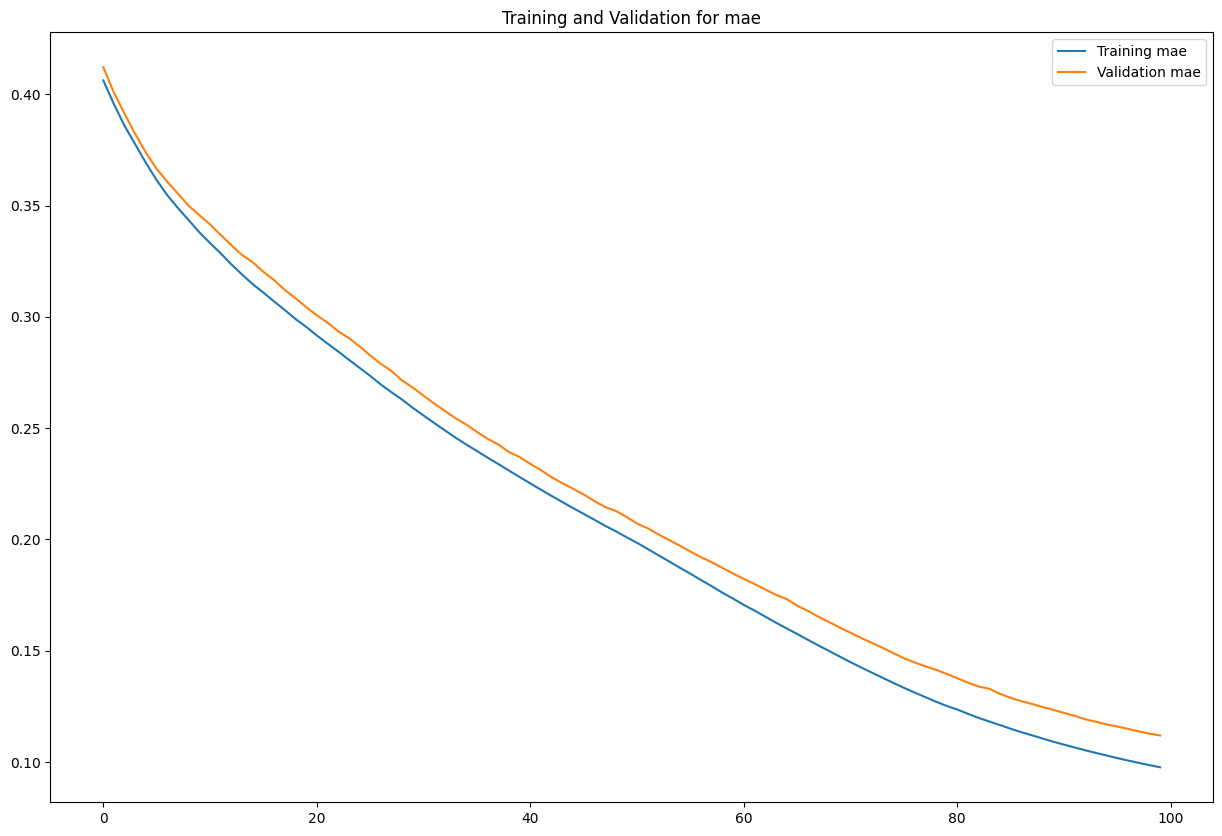

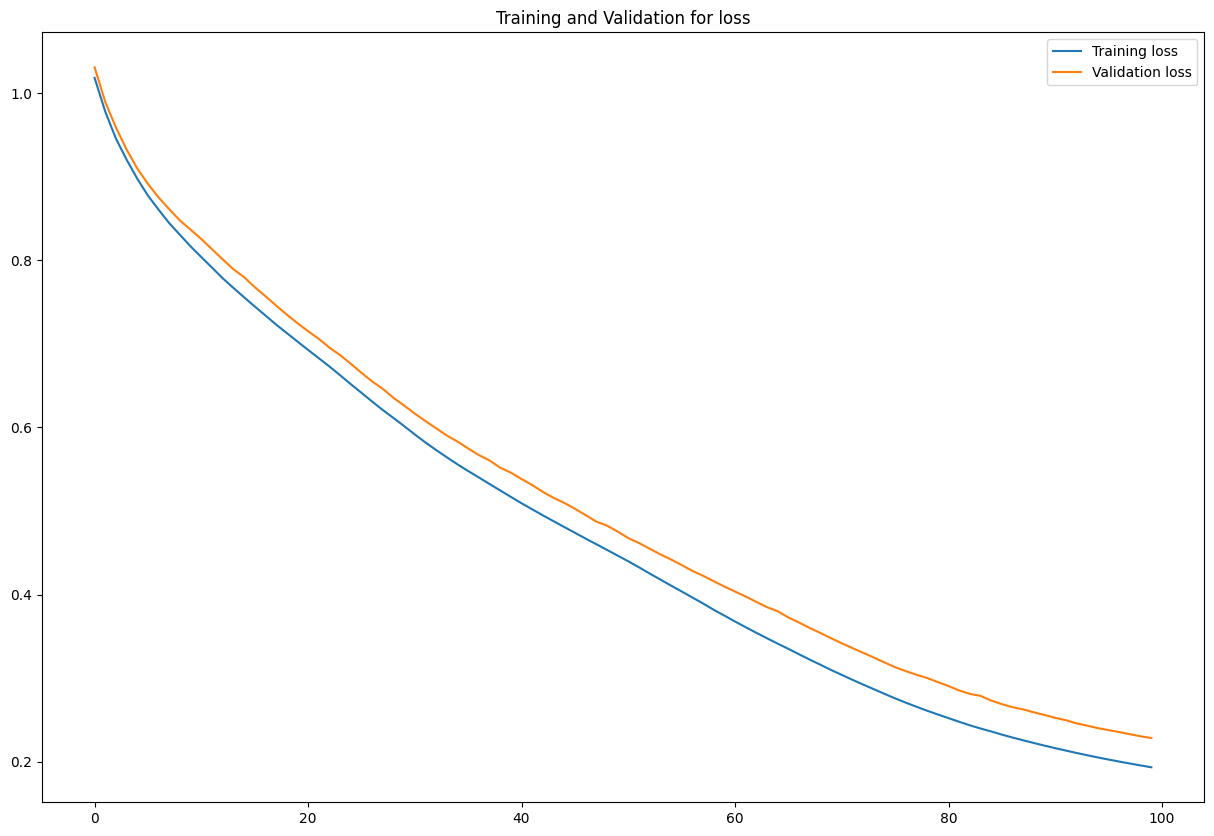

In [87]:
# plotting Graphs
plots = ['accuracy', 'mae', 'loss']
for plot in plots:
    metric = history.history[plot]
    val_metric = history.history[f"val_{plot}"]
    epochs = range(len(metric))

    plt.figure(figsize=(15, 10))
    plt.plot(epochs, metric, label=f"Training {plot}")
    plt.plot(epochs, val_metric, label=f"Validation {plot}")
    plt.legend()
    plt.title(f"Training and Validation for {plot}")
    plt.show()

In [88]:
X_test2 = np.array([[5,	4,	4,	4,	3,	3,	2,	4,	3,	4	,3,	4,	3,	4,	4	]]) #audio
y_pred2 = model.predict(X_test2)
y_pred2

1/1 [==============================] - 0s 76ms/step


array([[4.0107372e-01, 5.9858811e-01, 3.3805877e-04]], dtype=float32)

In [89]:
print(np.argmax(y_pred2,axis=1))
#0 = kinetik | 1 = audio | 2 = visual

[1]


In [93]:
from tensorflow.keras.models import load_model

model.save('/content/model/modelfinal.h5')

In [91]:
#import joblib
#joblib.dump(model,'conten/lr_model.pkl')

In [92]:
#import pickle

#pickle.dump(model, open('model.pkl', 'wb'))
#pickled_model = pickle.load(open('model.pkl', 'rb'))
#pickled_model.predict(X_test2)